In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import geopandas as gpd

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
fire = pd.read_csv('./data/FireStatics.csv', encoding = 'euckr')
fire

,연번,사망,부상,인명피해(명)소계,재산피해소계,시도,시군구,읍면동,발화열원,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,장소대분류,장소중분류,장소소분류,지번동
0,1,0,0,0,2920,경상남도,합천군,청덕면,작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,주거,단독주택,단독주택,청덕면
1,2,0,0,0,0,서울특별시,영등포구,여의도동,"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,기타,기타,임야,들불,기타 들불,여의도동
2,3,0,0,0,137,서울특별시,강남구,논현동,"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,"침구,직물류","기타(침구,직물류)","자동차,철도차량",자동차,오토바이,논현1동
3,4,0,0,0,326,서울특별시,도봉구,쌍문동,"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,"종이,목재,건초등","기타(종이,목재,건초등)","판매,업무시설",일반업무,일반빌딩,쌍문2동
4,5,0,0,0,0,부산광역시,연제구,연산동,작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,음식물,주거,공동주택,다세대주택,연산9동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44430,44431,0,0,0,59142,서울특별시,강남구,역삼동,미상(발화원인),미상,미상,미상,"전기,전자","콘센트, 스위치류",교육시설,"연구,학원",외국어학원,역삼1동
44431,44432,0,0,0,9784,경상북도,청도군,청도읍,작동기기,전기적 아크(단락),전기적 요인,미확인단락,합성수지,"플라스틱, PVC, 비닐, 장판","판매,업무시설",판매시설,전통시장,청도읍
44432,44433,0,0,0,0,강원도,양구군,남면,작동기기,"불꽃, 스파크, 정전기",전기적 요인,접촉불량에 의한 단락,"전기,전자","기타(전기,전자)",주거,단독주택,다가구주택,남면
44433,44434,0,0,0,2336,충청북도,청주시서원구,남이면,"불꽃, 불티",굴뚝(연통) 아궁이,기타,기타,"종이,목재,건초등","목재, 합판",산업시설,동식물시설,기타 동식물시설,남이면


In [3]:
mapData = gpd.read_file('./data/NGII_CDM_행정경계(읍면동)/Z_NGII_N3A_G0110000.shp', encoding = 'euckr')
mapData

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0300000000001G,1171010700,가락동,HJD010,None,None,"POLYGON ((968121.747 1944104.786, 968110.390 1..."
1,ARB0300000000002H,1153010300,가리봉동,HJD010,None,None,"POLYGON ((946583.428 1942313.156, 946571.832 1..."
2,ARB0300000000003I,1154510100,가산동,HJD010,None,None,"POLYGON ((945265.811 1943122.687, 945266.178 1..."
3,ARB0300000000004J,1150010400,가양동,HJD010,None,None,"POLYGON ((942099.814 1953439.759, 942175.611 1..."
4,ARB0300000000005K,1111014600,가회동,HJD010,None,None,"POLYGON ((954603.226 1953464.328, 954586.679 1..."
...,...,...,...,...,...,...,...
12914,ARB03000000009YUG,5013010400,호근동,HJD010,None,None,"POLYGON ((910214.781 1477136.360, 910223.155 1..."
12915,ARB03000000009YVH,5011011200,화북이동,HJD010,None,None,"POLYGON ((913925.830 1502998.695, 913925.067 1..."
12916,ARB03000000009YWI,5011011100,화북일동,HJD010,None,None,"POLYGON ((914271.916 1504412.361, 914272.012 1..."
12917,ARB03000000009YXJ,5013011300,회수동,HJD010,None,None,"POLYGON ((900925.277 1473867.196, 900929.971 1..."


<AxesSubplot:>

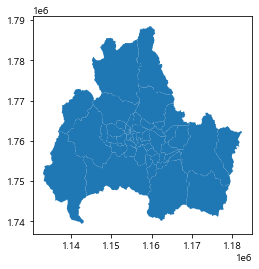

In [4]:
juMap = mapData.loc[mapData["BJCD"].astype(str).str.startswith("47130")]
juMap.plot()

In [5]:
juFire = fire[fire["시군구"] == '경주시']
juCnt = juFire.groupby(["시도", "시군구", "읍면동"]).size().reset_index(name = 'count')

<AxesSubplot:>

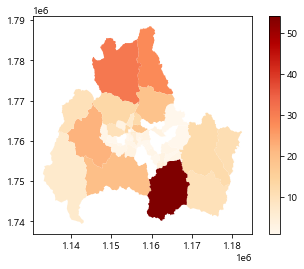

In [6]:
juMerge = pd.merge(juMap, juCnt, how = 'left', left_on = 'NAME', right_on = '읍면동')
juMerge.plot(column = 'count', cmap = 'OrRd', legend = True)

In [7]:
juFireCnt = juFire.groupby(["시도", "시군구", "읍면동", "발화열원"]).size().reset_index(name = 'count')
juFireCnt = juFireCnt.pivot(index = '읍면동', columns = '발화열원', values = 'count')

<AxesSubplot:xlabel='읍면동'>

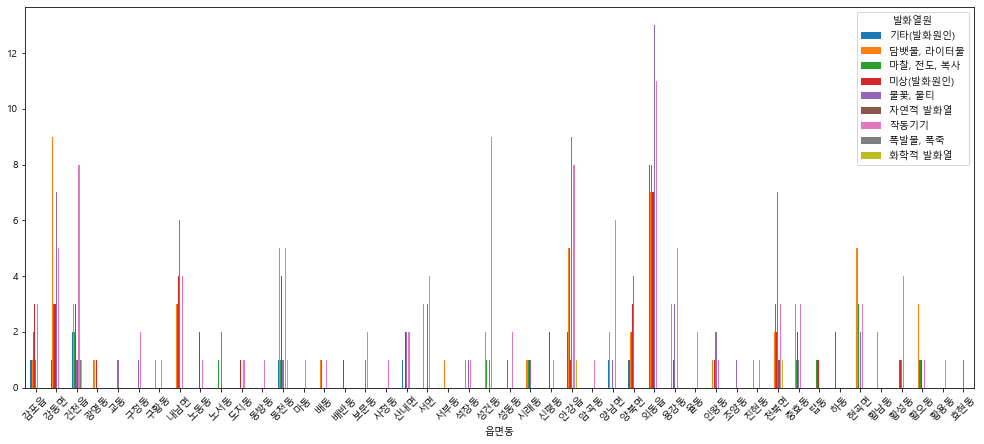

In [8]:
fig, ax = mpl.pyplot.subplots(figsize = (17,7))
juFireCnt.plot.bar(rot = 45, ax = ax)